In [6]:
# Importando as bibliotecas necessárias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [7]:
# Importando a base de dados e verificando sua estrutura
# Leitura no Macbook
#df = pd.read_csv("/Users/MacEnzo/Desktop/House_Pricing_ML/data/house_prices.csv")

# Leitura no Windows
df = pd.read_csv(r"C:\Users\Enzo\Desktop\GitHub\House_Pricing_ML\data\house_prices.csv")
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,N,N,N,N,N
view,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
# Criando uma coluna para cada parte da data (ano, mês e dia) e excluindo a coluna original

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df.drop("date", axis=1, inplace=True)

In [10]:
# Verificando os valores únicos da coluna "condition"

df["condition"].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [11]:
# Transformando os 5 valores únicos da coluna para colunas próprias utilizando dummies

df = pd.get_dummies(df, columns=["condition"], dtype="int")

In [12]:
# Verificando os valores únicos da coluna "waterfront"

df["waterfront"].unique()

array(['N', 'Y'], dtype=object)

In [13]:
# Substituindo os valores "N" para 0 e "Y" para 1

df["waterfront"] = df["waterfront"].replace(["N", "Y"], [0, 1])


C:\Users\Enzo\AppData\Local\Temp\ipykernel_19076\3843686996.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["waterfront"] = df["waterfront"].replace(["N", "Y"], [0, 1])


In [14]:
# Verificando o resultado da manipulação de dados feita até o momento
pd.set_option('display.float_format', '{:,.0f}'.format) # Sem casas decimais e com separador de milhar

df.head().T

,0,1,2,3,4
id,"7,129,300,520","6,414,100,192","5,631,500,400","2,487,200,875","1,954,400,510"
price,"221,900","538,000","180,000","604,000","510,000"
bedrooms,3,3,2,4,3
bathrooms,1,2,1,3,2
sqft_living,"1,180","2,570",770,"1,960","1,680"
sqft_lot,"5,650","7,242","10,000","5,000","8,080"
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0
grade,7,7,6,7,8


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21613 non-null  int64  
 1   price                21613 non-null  float64
 2   bedrooms             21613 non-null  int64  
 3   bathrooms            21613 non-null  float64
 4   sqft_living          21613 non-null  int64  
 5   sqft_lot             21613 non-null  int64  
 6   floors               21613 non-null  float64
 7   waterfront           21613 non-null  int64  
 8   view                 21613 non-null  int64  
 9   grade                21613 non-null  int64  
 10  sqft_above           21613 non-null  int64  
 11  sqft_basement        21613 non-null  int64  
 12  yr_built             21613 non-null  int64  
 13  yr_renovated         21613 non-null  int64  
 14  zipcode              21613 non-null  int64  
 15  lat                  21613 non-null 

## Análise exploratória dos dados

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"21,613","4,580,301,521","2,876,565,571","1,000,102","2,123,049,194","3,904,930,410","7,308,900,445","9,900,000,190"
price,"21,613","540,088","367,127","75,000","321,950","450,000","645,000","7,700,000"
bedrooms,"21,613",3,1,0,3,3,4,33
bathrooms,"21,613",2,1,0,2,2,2,8
sqft_living,"21,613","2,080",918,290,"1,427","1,910","2,550","13,540"
sqft_lot,"21,613","15,107","41,421",520,"5,040","7,618","10,688","1,651,359"
floors,"21,613",1,1,1,1,2,2,4
waterfront,"21,613",0,0,0,0,0,0,1
view,"21,613",0,1,0,0,0,0,4
grade,"21,613",8,1,1,7,7,8,13


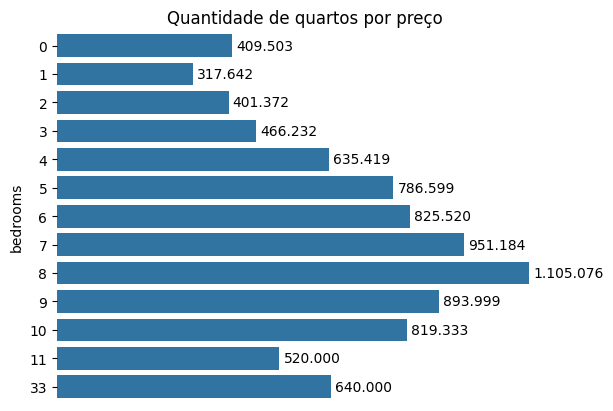

In [17]:
# Gráfico de preço por quantidade de quartos
ax = sns.barplot(data=df, y='bedrooms', x='price', errorbar=None, orient='h')
plt.title('Quantidade de quartos por preço')

# Adicionar os valores no final de cada barra
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(p.get_width()):,}'.replace(',', '.') for p in container], label_type='edge', padding=3)

# Remover o eixo Y
ax.set_xlabel('')
ax.set_xticks([])

# Retirando as bordas
sns.despine(left=True, bottom=True)

# Mostrar o gráfico
plt.show()


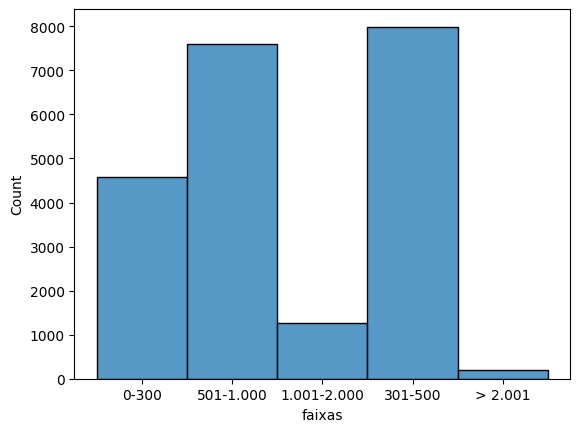

In [18]:
# Distribuição de preços
# Criando faixas de preço para criação do gráfico
def categorizar_preco(x):
    if x <= 300000:
        return "0-300"
    elif x >300000 and x <= 500000:
        return "301-500"
    elif x >500000 and x <= 1000000:
        return "501-1.000"
    elif x >1000000 and x <= 2000000:
        return "1.001-2.000"
    elif x > 2000000:
        return "> 2.001"
df['faixas'] = df['price'].apply(categorizar_preco)

ax = sns.histplot(data=df, x='faixas')

# Formatar o eixo X para mostrar números inteiros sem notação científica
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

plt.show()

In [19]:
# Gráfico de quantidade de banheiros por preço